In [1]:
#hide
# !pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [5]:
skin_type = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms())

In [12]:
dls = skin_type.dataloaders('./skin_type')

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [13]:
skin_type = skin_type.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [14]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(25)

epoch,train_loss,valid_loss,error_rate,time
0,2.489505,2.691543,0.723404,01:01


epoch,train_loss,valid_loss,error_rate,time
0,1.714898,2.208254,0.702128,01:16
1,1.644399,1.553211,0.638298,01:08
2,1.430680,1.149878,0.446809,01:06
3,1.316039,0.983444,0.404255,01:12
4,1.192661,0.985063,0.404255,01:07
5,1.056579,0.908714,0.340426,01:08
6,0.930660,0.862135,0.297872,01:07
7,0.869090,0.799339,0.234043,01:05
8,0.790041,0.747198,0.212766,01:06
9,0.726003,0.712473,0.191489,01:06


KeyboardInterrupt: 

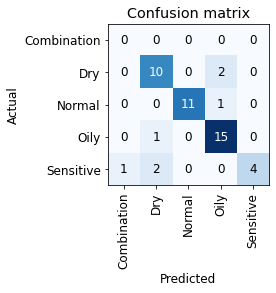

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [16]:
learn.export()

In [17]:
path = Path()